<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
Mean Squared

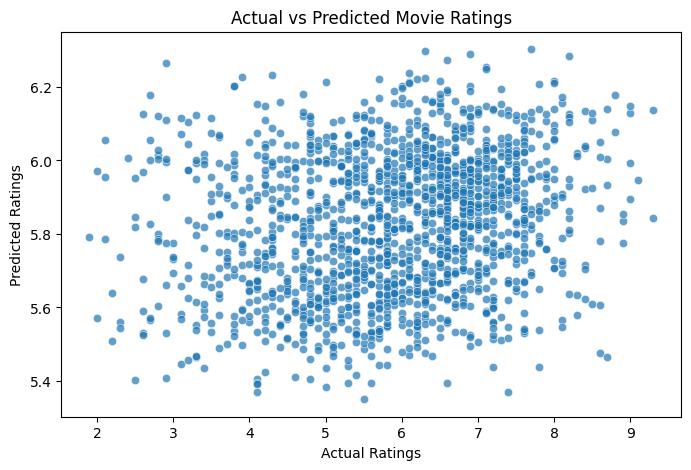

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/IMDb Movies India.csv" , encoding='ISO-8859-1')

# Display basic details
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing ratings (if applicable)
df = df.dropna(subset=['Rating'])

# Encoding categorical features
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']  # Adjust based on dataset
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Define features and target
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]  # Modify as per relevant features
y = df['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared Score: {r2}")


Mean Squared Error (MSE): 1.7911567585225485
Mean Absolute Error (MAE): 1.0773629142305363
R-Squared Score: 0.036569701113539965


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R-Squared: {rf_r2}")


Random Forest MSE: 1.6563884409664351
Random Forest MAE: 1.0243525147306398
Random Forest R-Squared: 0.10905910208066205


In [ ]:
import joblib

joblib.dump(rf_model, "movie_rating_model.pkl")  # Save the model
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load saved model
loaded_model = joblib.load("movie_rating_model.pkl")

# Example movie with features (replace with real values)
new_movie = [[3, 45, 21, 10, 5]]  # Example feature values

# Predict rating
predicted_rating = loaded_model.predict(new_movie)
print(f"Predicted Rating: {predicted_rating[0]}")


Predicted Rating: 5.598999999999997


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


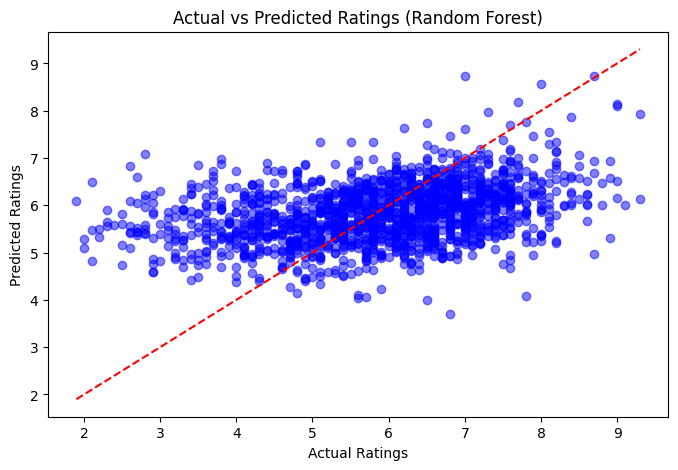

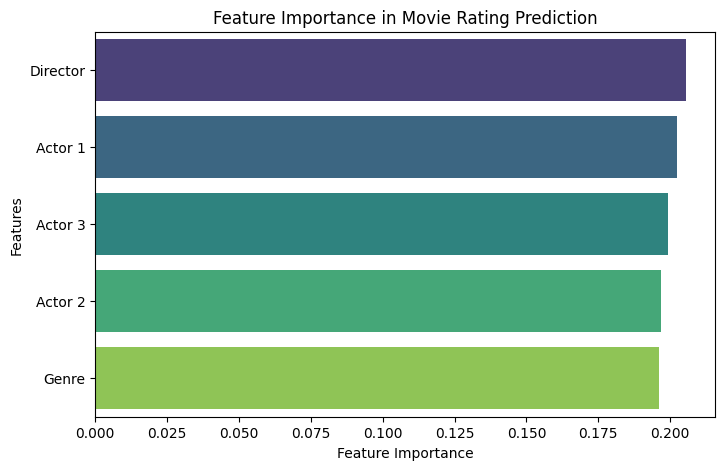

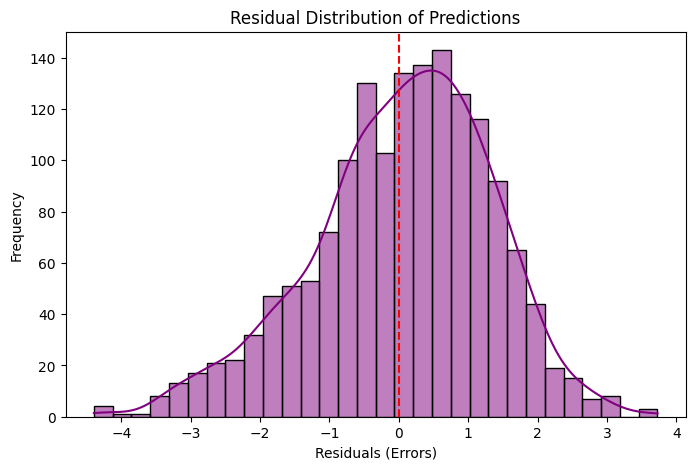

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Scatter Plot: Actual vs Predicted Ratings
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()

# 2️⃣ Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(8, 5))
# Convert feature importance into a DataFrame
importance_df = pd.DataFrame({
    "Feature": [feature_names[i] for i in indices],
    "Importance": importances[indices]
})

sns.barplot(data=importance_df,x=importances[indices], y=[feature_names[i] for i in indices],hue="Feature", palette="viridis",  legend=False,)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Movie Rating Prediction")
plt.show()

# 3️⃣ Residual Plot (Errors)
residuals = y_test - y_rf_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='dashed')  # Centerline at zero
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Distribution of Predictions")
plt.show()
